In [1]:
%matplotlib inline


# Hinton diagrams

Hinton diagrams are useful for visualizing the values of a 2D array (e.g.
a weight matrix): Positive and negative values are represented by white and
black squares, respectively, and the size of each square represents the
magnitude of each value.

Initial idea from David Warde-Farley on the SciPy Cookbook


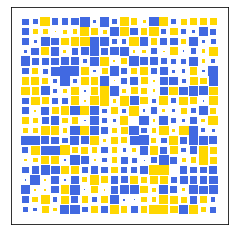

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('white')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'royalblue' if w > 0 else 'gold'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor = color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()

In [14]:
#!pip install mpltools
from mpltools import special

In [15]:
import os
import glob

path = 'C:/Users/user/Desktop/xg-data-analysis/datasets/cleanedAdvanced'
extension = 'csv'
os.chdir(path)
results = glob.glob('*pass*.{}'.format(extension))

In [16]:
results

['huddersfield-pass1718-cleaned.csv',
 'huddersfield-pass1819-cleaned.csv',
 'leeds-pass2021-cleaned.csv',
 'leeds-pass2122-cleaned.csv',
 'sheffutd-pass1920-cleaned.csv',
 'sheffutd-pass2021-cleaned.csv']

In [48]:
lst = []
for i in range(len(results)):
    df = "df" + str(i)
    df = pd.read_csv(results[i])
    lst.append(df)

In [49]:
lst[0].columns

Index(['Player', 'Nation', 'Pos', 'Age', '90s', 'CmpTotal', 'AttemptedTotal',
       'Cmp%Total', 'TotDist', 'ProgressiveDist', 'ShortCmp', 'ShortAttempted',
       'ShortCmp%', 'MediumCmp', 'MediumAttempt', 'MediumCmp%', 'LongCmp',
       'LongAttempted', 'LongCmp%', 'Assists', 'xAG', 'xA', 'A-xAG',
       'KeyPasses', 'CompletedFinalThird', 'PassesPenaltyArea', 'CrossesPA',
       'ProgressivePasses'],
      dtype='object')

In [56]:
lst[0].iloc[-1:]['CmpTotal'].item()

12036

In [45]:
import numpy as np
matrix = []

In [59]:
for i in range(len(lst)):
    vals = []
    ttl = lst[i].iloc[-1:]['AttemptedTotal'].item()
    shrt = lst[i].iloc[-1:]['ShortAttempted'].item()
    med = lst[i].iloc[-1:]['MediumAttempt'].item()
    long = lst[i].iloc[-1:]['LongAttempted'].item()
    vals.append(ttl)
    vals.append(shrt)
    vals.append(med)
    vals.append(long)
    matrix.append(vals)

In [63]:
matrix

[[16822, 6357, 6127, 3270],
 [17777, 7200, 6029, 3398],
 [20629, 7933, 8308, 3014],
 [18288, 7285, 7050, 2754],
 [16858, 6687, 5657, 3404],
 [16264, 6905, 5303, 2840]]

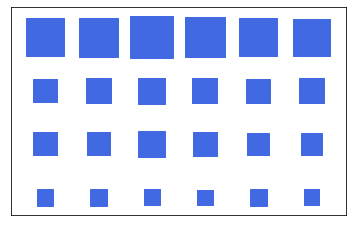

In [67]:
hinton(matrix)
plt.show()